## Analysis of a drugstore chain sales


We are going to analyze a sample of data from the sales of a drugstore retail chain.

From the data we'll try to answer to the following questions:

1. Which area is the best location for a drugstore?
2. Which products have been sold the most considering quantity, sales and profit? 
3. What areas of products to focus for marketing campaign?

The data is extracted from a db with a few million rows. 
The data was aggregated on the 'Total_Sales', 'Units_Sold' and 'Net_Profit' by IdLocation and calendar months('YYYY-MM').
I extracted only the products that met the top 10 criteria on either 'Total_Sales' or 'Net_Profit' for each classification and for each of the 5 locations.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [693]:
# We import the data from csv file:
df = pd.read_csv('think capstone1_slim.csv' ,encoding ='latin1')
# initially I got this error and had to use 'encoding': " 'utf-8' codec can't decode byte  in position : invalid start byte"

In [694]:
# Get a feel for the data:
df.head()

,YYYY_MM,IdProduct,Product_Name,Manufacturer_Name,Product Classification,IdLocation,Drugstore_Name,Total_Sales,No_of_transactions,No_of_medical_prescriptions,Units_Sold,Net_Profit,row_num_sales,row_num_profit
0,2015-1,20177,Nut Seringa Ject 10 Ml Cu Ac,MINUT,_DispozitivMedicalMultiplu,3,Stad,45.73,15,0,86.0,18.07,2,3
1,2015-1,2130,Panthen Unguent 50 Mg /G X 100 G,BAYER SCHERING,Cosmetice,3,Stad,265.55,4,0,5.0,46.66,1,1
2,2015-1,18,Oderma Abc Derm Gel Spumant X 200 Ml,BIODERMA,Cosmetice,3,Stad,37.42,1,0,1.0,9.45,14,9
3,2015-1,20697,Ltene Tratament Pt Unghii,FOLTENE,Cosmetice,3,Stad,48.90,1,0,1.0,4.38,8,33
4,2015-1,25030,Nsiprod Tensiometru Pentru Brat,PANSIPROD,Dispozitive Medicale,3,Stad,408.16,2,0,2.0,96.13,1,2


In [695]:
# What kind of data is in the dataframe?
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 14 columns):
YYYY_MM                        1686 non-null object
IdProduct                      1686 non-null int64
Product_Name                   1686 non-null object
Manufacturer_Name              1686 non-null object
Product Classification         1686 non-null object
IdLocation                     1686 non-null int64
Drugstore_Name                 1686 non-null object
Total_Sales                    1686 non-null float64
No_of_transactions             1686 non-null int64
No_of_medical_prescriptions    1686 non-null int64
Units_Sold                     1686 non-null float64
Net_Profit                     1686 non-null float64
row_num_sales                  1686 non-null int64
row_num_profit                 1686 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 184.5+ KB
None


In [700]:
# Generate a list of unique elements along with how often they occur.
(values, counts) = np.unique(df['IdLocation'], return_counts=True)
print('Values:',values,'\n No of Lines:',counts)

Values: [   3    4   18 1001 1002] 
 No of Lines: [318 320 360 359 329]


In [339]:
df['Product Classification'].value_counts()

RX                            211
Suplimente                    207
OTC                           205
Cosmetice                     204
Parafarm.                     200
Dispozitive Medicale          190
PROPRII                       158
_DispozitivMedicalMultiplu    158
Homeopate                      79
0 Consumabile                  58
RX - 120                       15
0 Obiecte de inventar           1
Name: Product Classification, dtype: int64

In [7]:
df.describe()

,IdProduct,IdLocation,Total_Sales,No_of_transactions,No_of_medical_prescriptions,Units_Sold,Net_Profit,row_num_sales,row_num_profit
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,17536.994662,413.838078,755.249087,45.064650,5.153025,94.325463,177.627141,8.174377,17.077106
std,10105.808406,488.085122,1324.470312,186.227578,20.279157,671.290253,293.222479,7.835199,52.260305
min,13.000000,3.000000,0.080000,0.000000,0.000000,0.100000,-407.790000,1.000000,1.000000
25%,8709.000000,4.000000,95.887500,3.000000,0.000000,3.000000,18.240000,3.000000,3.000000
50%,20178.000000,18.000000,278.640000,11.000000,0.000000,11.000000,65.215000,6.500000,6.500000
75%,25873.750000,1001.000000,808.340000,33.000000,0.000000,40.000000,224.167500,10.000000,10.000000
max,31609.000000,1002.000000,20388.060000,3346.000000,196.000000,15500.000000,2614.640000,69.000000,845.000000


## 1. Which area is the best location for a drugstore?

The criteria to pick the area for a good location can be:
- it brings the most profit;
- it brings the biggest sales: maybe there are a lot of customers going in;
- there are a lot customers passing by but the sales team is lacking selling skills.

In [706]:
# Overview of the columns that have sumable values:
df.groupby('IdLocation')['Total_Sales','No_of_transactions','No_of_medical_prescriptions','Units_Sold','Net_Profit'].sum()



,Total_Sales,No_of_transactions,No_of_medical_prescriptions,Units_Sold,Net_Profit
IdLocation,,,,,
3,168764.91,12635,1057,25232.64,35656.40
4,244735.70,23494,1080,31090.06,60347.67
18,237503.71,9070,1925,12288.91,55693.37
1001,308659.38,16388,1375,30830.56,63431.54
1002,313686.26,14392,3251,59590.56,84350.38


Total_Sales >> By the number of sales there is almost a tie between location 1001 and 1002.

No_of_transactions >> Looking at number of transactions, which can be approximated with the number of clients (we ignore the fact that some of the clients may come in more than once in the anlyzed period of time(~3 months)), we can say that idlocation 4 has the best traffic.

No_of_medical_prescriptions >> A higher number means that there are a lot of patients with chronic disease that are 'obliged' to seek a pharmacy for their drugs. This patients can be convinced to buy more OTC or cosmetics next to their prescription which may bring more profit. IdLocation 1002 leads by far.

Units_Sold >> The more units are sold the more chance to sell a product that has a higher margin. Advantage IdLocation 1002 by a long distance (almost double the 2nd place).

Net_Profit >> the core indicator which directly shows wich location is the best: IdLocation 1002.
However we discover that IdLocation 4 and 1001 are very close to each other, number 4 recovers through the higher number of transactions(clients). Number 4 has to work more the same profit than 1001 which sells more expensive products to thick-wallet customers.


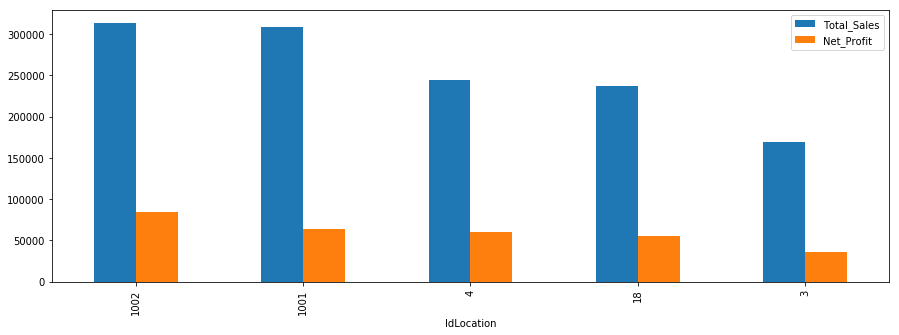

In [707]:
c=df.groupby(['IdLocation'])['Total_Sales','Net_Profit'].sum()
c.sort_values(by='Total_Sales',ascending=False).plot( kind = 'bar' ,figsize = (15,5))
plt.show()

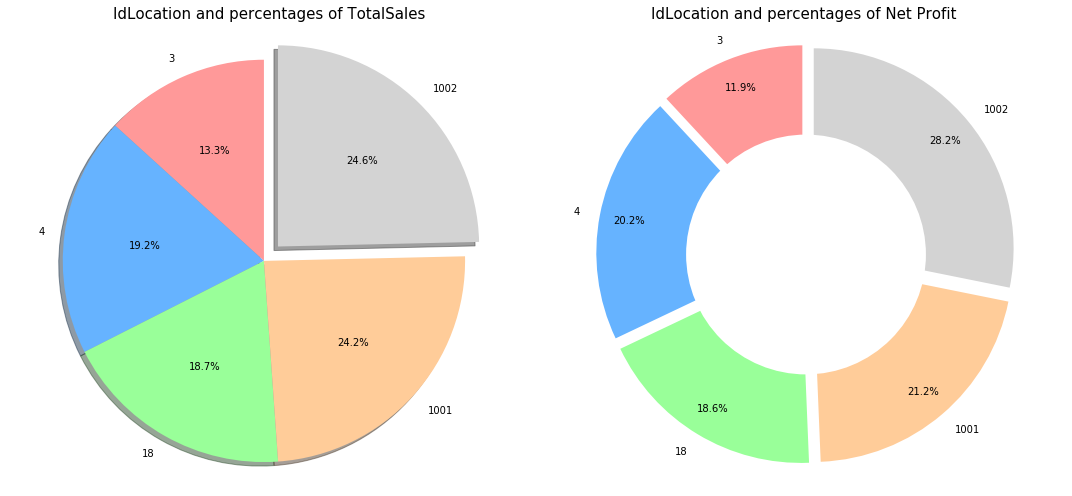

In [708]:

fig1,(ax1 , ax2) = plt.subplots(1,2)

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#d3d3d3']
explode =  (0, 0, 0, 0,0.1) 

ax1.pie( df.groupby(['IdLocation'])['Total_Sales'].sum(), explode=explode, labels=np.unique(df.IdLocation)
        , colors = colors, autopct='%1.1f%%',  shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle

ax1.axis('equal')  
ax1.set_title('IdLocation and percentages of TotalSales',fontsize= 15)


#----------------------
#colors
colors2 = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#d3d3d3']
#explsion
explode2 = (0.05,0.05,0.05,0.05,0.05)

ax2.pie( df.groupby(['IdLocation'])['Net_Profit'].sum(), colors = colors2, labels=np.unique(df.IdLocation)
         , autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode2 )

#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.set_size_inches(15,7)
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
ax2.set_title('IdLocation and percentages of Net Profit',fontsize= 15)

plt.tight_layout()

plt.show()

We can conclude that location 1002 has a good sales team that manages to perform better with a lower number of clients.

## 2. Which products have been sold the most considering quantity, sales and profit? 


In [748]:
df.groupby(['Product_Name'])['Net_Profit'].sum().nlargest(5)



Product_Name
O-Dis L-Arginina 500 Mg X 50 Cps.     21577.01
Eprazol Atb 20 Mg X 20 Cps. Gastr.    16787.49
Bilet 5 Mg X 28 Cpr.                   9990.44
Rtensif Sr 1.5 Mg X 30 Cpr.            8338.17
O-Dis Digmax 400 Mg X 50 Cps.          8139.40
Name: Net_Profit, dtype: float64

                           Product_Name  Net_Profit
289   O-Dis L-Arginina 500 Mg X 50 Cps.    21577.01
80   Eprazol Atb 20 Mg X 20 Cps. Gastr.    16787.49
29                 Bilet 5 Mg X 28 Cpr.     9990.44
419         Rtensif Sr 1.5 Mg X 30 Cpr.     8338.17
287       O-Dis Digmax 400 Mg X 50 Cps.     8139.40


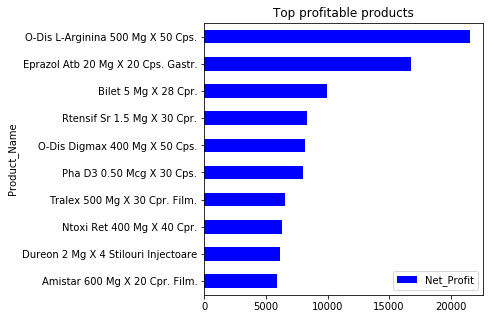

In [749]:
a = df.groupby(['Product_Name'])['Net_Profit'].sum().reset_index()
a = a.sort_values(by=['Net_Profit'],ascending=False)
print(a.head())

a.head(10).plot(x='Product_Name', y ='Net_Profit' , kind='barh', figsize=[5, 5]
                ,title="Top profitable products"
               ,color='b'
               )
plt.gca().invert_yaxis()
plt.show()

    Manufacturer_Name  Net_Profit
22            BIO-DIS    52567.66
73       LAB. SERVIER    30225.39
10        ANTIBIOTICE    20327.19
19      BERLIN CHEMIE    17227.96
116   TERAPIA RANBAXY    14453.64


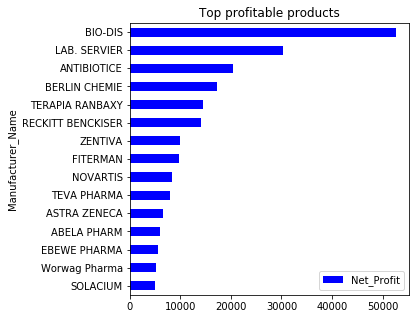

In [784]:
a = df.groupby(['Manufacturer_Name'])['Net_Profit'].sum().reset_index()
a = a.sort_values(by=['Net_Profit'],ascending=False)

print(a.head())

a.head(15).plot(x='Manufacturer_Name', y ='Net_Profit' , kind='barh'
               , figsize=[5, 5],title="Top profitable products"
              , color = 'b'
              )
plt.gca().invert_yaxis()
plt.show()

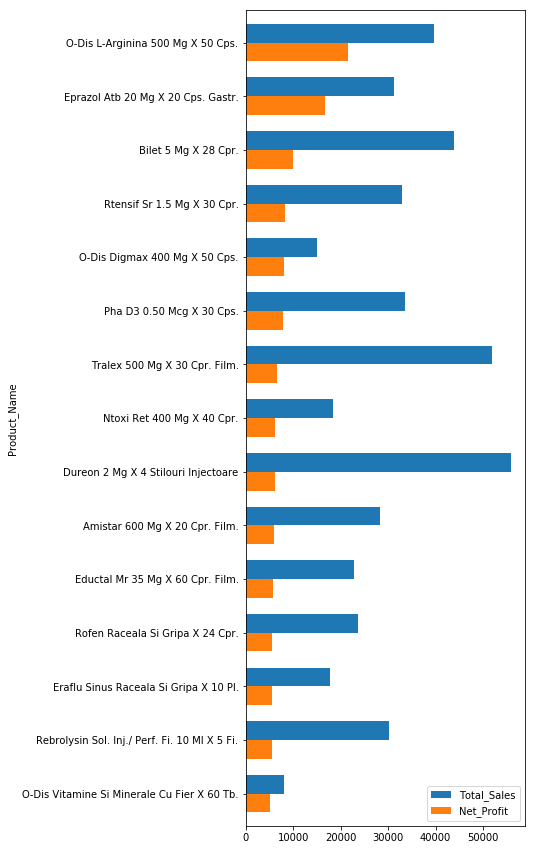

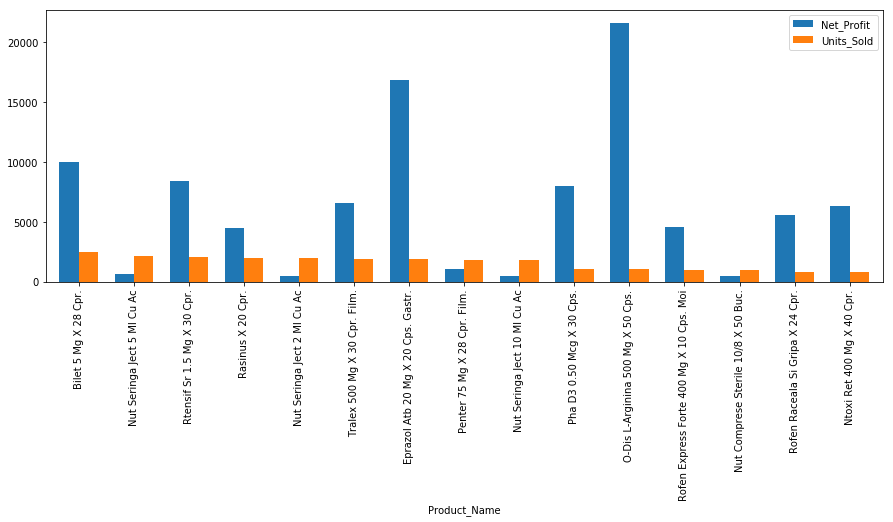

In [787]:

#fig1,(b , c) = plt.subplots(1,2)

b = df.groupby(['Product_Name'],sort = False)['Total_Sales','Net_Profit'].sum()
b.sort_values(by='Net_Profit',ascending=False).head(15).plot( kind = 'barh' ,figsize = (5,15) , width=0.7)
plt.gca().invert_yaxis()


c=df.groupby(['Product_Name'])['Net_Profit','Units_Sold'].sum() #No_of_transactions

c=c.sort_values(by='Units_Sold',ascending=False)
c=c.drop(['Nga Hartie Mica','Nga Hartie Mare','Cosa 1 Ecotaxa Mica'])

c.head(15).plot( kind = 'bar' ,figsize = (15,5) , width=0.7)
#plt.gca().invert_yaxis()
plt.show()


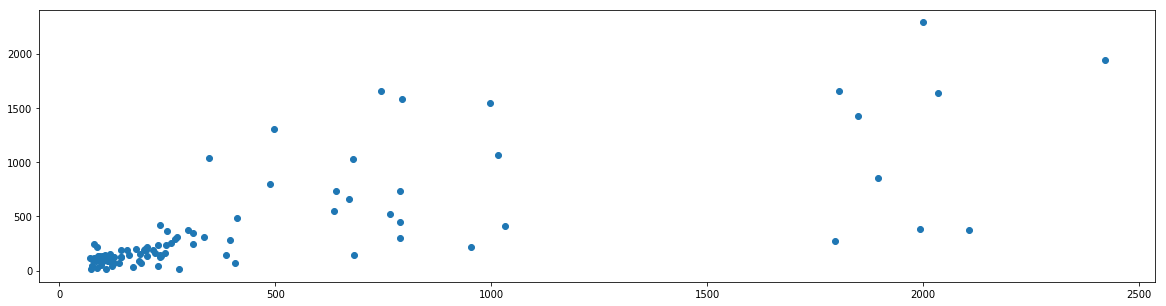

In [788]:
c=df.groupby(['Product_Name'])['Net_Profit','Units_Sold','No_of_transactions'].sum() #No_of_transactions

c=c.sort_values(by='Units_Sold',ascending=False)
c=c.drop(['Nga Hartie Mica','Nga Hartie Mare','Cosa 1 Ecotaxa Mica'])

#print(c.head(15))

plt.figure(figsize=(20, 5))
plt.scatter('Units_Sold','No_of_transactions' , data = c.head(100) , marker='o' )
#plt.scatter('No_of_transactions','Net_Profit' , data = c.head(100) , marker='x' )

plt.show()

                                               Net_Profit  Units_Sold  \
Product_Name                                                            
O-Dis L-Arginina 500 Mg X 50 Cps.                21577.01     1016.74   
Eprazol Atb 20 Mg X 20 Cps. Gastr.               16787.49     1848.40   
Bilet 5 Mg X 28 Cpr.                              9990.44     2419.85   
Rtensif Sr 1.5 Mg X 30 Cpr.                       8338.17     2033.97   
O-Dis Digmax 400 Mg X 50 Cps.                     8139.40      347.04   
Pha D3 0.50 Mcg X 30 Cps.                         7969.77     1032.87   
Tralex 500 Mg X 30 Cpr. Film.                     6579.59     1895.49   
Ntoxi Ret 400 Mg X 40 Cpr.                        6285.58      789.00   
Dureon 2 Mg X 4 Stilouri Injectoare               6102.80      122.00   
Amistar 600 Mg X 20 Cpr. Film.                    5898.84      386.50   
Eductal Mr 35 Mg X 60 Cpr. Film.                  5811.23      635.86   
Rofen Raceala Si Gripa X 24 Cpr.                  5

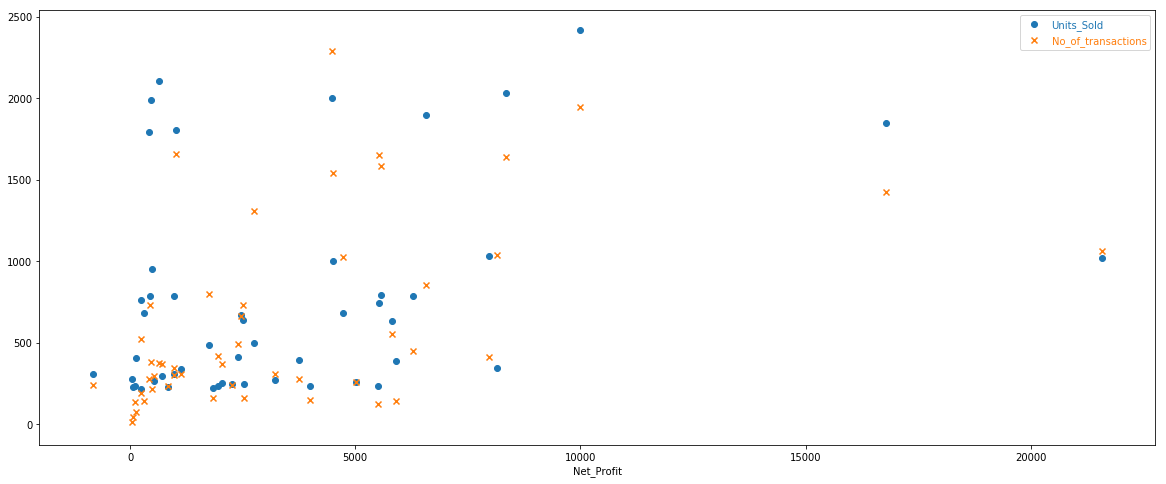

In [789]:
d=df.groupby(['Product_Name'])['Net_Profit','Units_Sold','No_of_transactions'].sum() #No_of_transactions

d=d.sort_values(by='Net_Profit',ascending=False)
d=d.drop(['Nga Hartie Mica','Nga Hartie Mare','Cosa 1 Ecotaxa Mica'])

print(d.head(15))

fig, ax = plt.subplots(figsize=(20,8))

#fig = plt.figure(figsize=(10,5))
#ax1=fig.add_subplot(121)
#ax2=fig.add_subplot(122)
#plt.subplots_adjust(wspace = 0.33 )

ax.scatter('Net_Profit','Units_Sold' , data = c.head(50) , marker='o' )
ax.scatter('Net_Profit' ,'No_of_transactions', data = c.head(50) , marker='x' )

leg = ax.legend()

for h, t in zip(leg.legendHandles, leg.get_texts()):
    t.set_color(h.get_facecolor()[0])
plt.xlabel('Net_Profit')
plt.show()

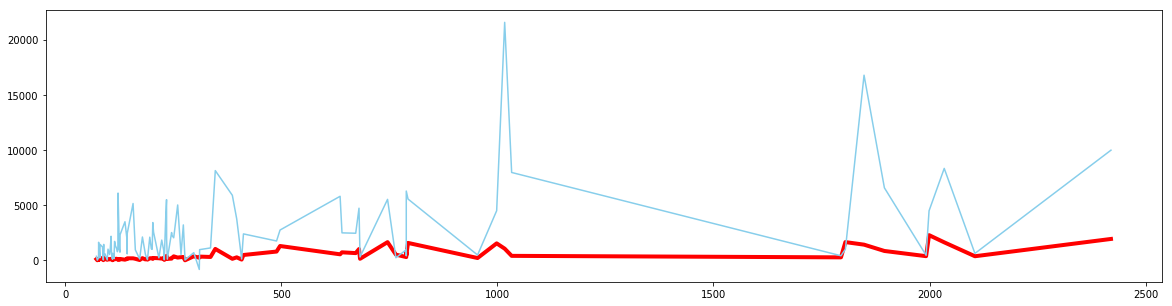

In [790]:
e=df.groupby(['Product_Name'])['Net_Profit','Units_Sold','No_of_transactions'].sum() #No_of_transactions

e=e.sort_values(by='Units_Sold',ascending=False)
e=e.drop(['Nga Hartie Mica','Nga Hartie Mare','Cosa 1 Ecotaxa Mica'])

#print(c.head(15))

plt.figure(figsize=(20, 5))
plt.plot('Units_Sold','No_of_transactions' , data = c.head(100), color='red'  ,linewidth=4 )
plt.plot('Units_Sold','Net_Profit'  , data = c.head(100) , color='skyblue'  )

plt.show()

## 3. What areas of products to focus for marketing campaign?

We take a look first at the number of clients per product classification and we see that OTC and RX are the most tradeable groups.

                           No_of_transactions                                
IdLocation                               3       4       18      1001    1002
Product Classification                                                       
Cosmetice                                93.0   117.0    91.0   116.0   134.0
Dispozitive Medicale                    192.0   392.0   178.0   271.0   297.0
Homeopate                                 1.0     3.0    46.0    33.0    10.0
OTC                                    2514.0  4233.0  2550.0  3577.0  3621.0
PROPRII                                 465.0   626.0   997.0   542.0   984.0
Parafarm.                               430.0   797.0   438.0   694.0   764.0
RX                                     1336.0  1483.0  2320.0  1773.0  3848.0
RX - 120                                  7.0    17.0    30.0    14.0    13.0
Suplimente                              769.0  1093.0   846.0  1110.0  1144.0
_DispozitivMedicalMultiplu              186.0   311.0   246.0   

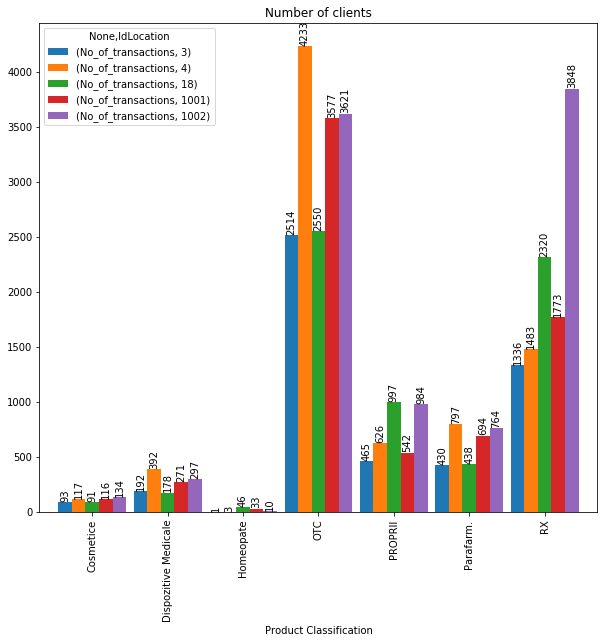

In [747]:
b = df.groupby(['Product Classification','IdLocation'])['No_of_transactions'].sum().reset_index()
#b = b.sort_values(by=['Product Classification','No_of_transactions'],ascending=False)

b = b.pivot( index='Product Classification' , columns= 'IdLocation')
#b.columns = b.columns.get_level_values(1)
b = b.drop(['0 Consumabile','0 Obiecte de inventar'])
print(b)
col_list=b.columns.tolist()

col_id=[]

for item in col_list:
    col_id.append(item[1])

#plt.figure(figsize=(12, 8))
ax=b.head(7).plot( kind='bar'
               , figsize=[10, 9],title="Number of clients"
              #, color = 'b'
               , width=0.9
              )
    
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())    

rects = ax.patches

# Make some labels.
labels = ["%d" % i for i in totals]
#print(labels)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label
            , ha='center', va='bottom'
            ,rotation = 90
           )

plt.show()

In [763]:
df.groupby(['Product Classification'])['Net_Profit'].sum()

Product Classification
0 Consumabile                   1375.05
0 Obiecte de inventar             -2.75
Cosmetice                       3195.96
Dispozitive Medicale           10973.16
Homeopate                        504.48
OTC                            55431.14
PROPRII                        52567.66
Parafarm.                       9957.36
RX                            129235.93
RX - 120                          84.46
Suplimente                     33842.46
_DispozitivMedicalMultiplu      2314.45
Name: Net_Profit, dtype: float64

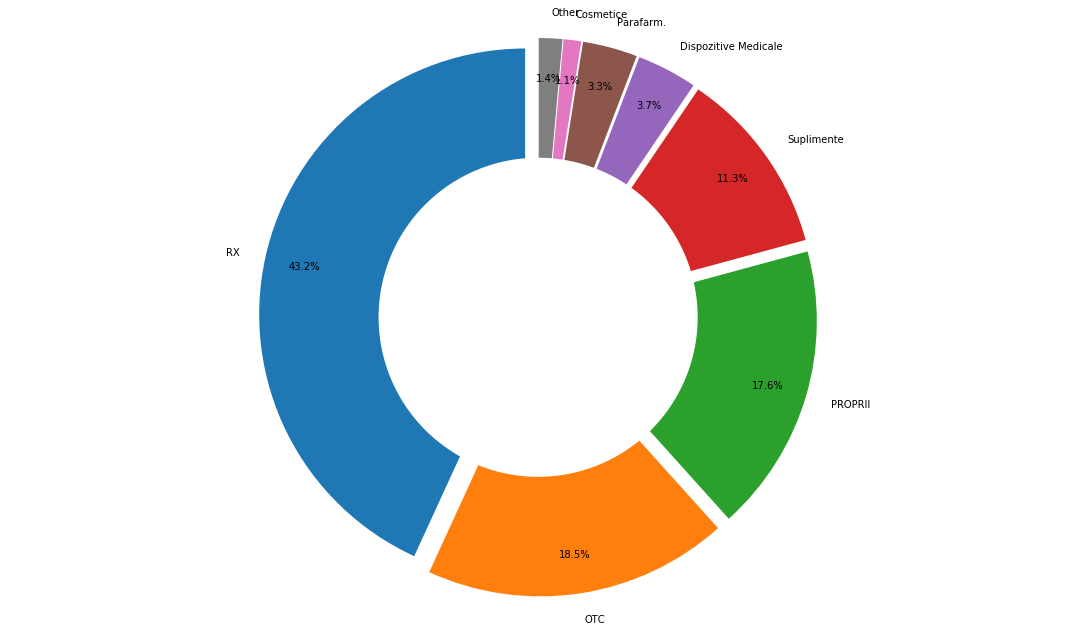

In [775]:


c = df.groupby(['Product Classification'])['Net_Profit'].sum().reset_index()
c = c.sort_values(by=['Net_Profit'],ascending=False)


other = c[7:].sum()
c = c[:7]
c.loc[11]=other
c.iloc[7,c.columns.get_loc('Product Classification')] = 'Other'

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#d3d3d3']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)


fig1,ax1 = plt.subplots()
ax1.pie( c['Net_Profit'] #c.groupby(['Product Classification'])['Net_Profit'].sum()
        #, colors = colors
        
        , labels=c['Product Classification']
        , autopct='%1.1f%%', startangle=90, pctdistance=0.85
        , explode = explode
       )
#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.set_size_inches(15,9)
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
#plt.title('IdLocation and percentages of NetProfit')
plt.tight_layout()
plt.show()

In [776]:
df['Product Classification'].value_counts()

RX                            211
Suplimente                    207
OTC                           205
Cosmetice                     204
Parafarm.                     200
Dispozitive Medicale          190
PROPRII                       158
_DispozitivMedicalMultiplu    158
Homeopate                      79
0 Consumabile                  58
RX - 120                       15
0 Obiecte de inventar           1
Name: Product Classification, dtype: int64

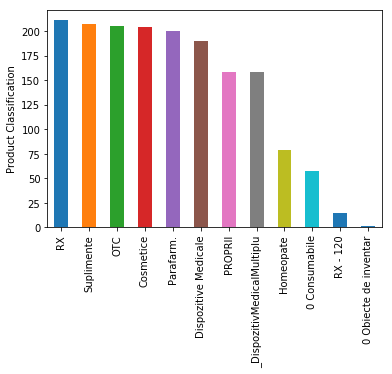

In [777]:
df['Product Classification'].value_counts().plot( kind='bar' )
plt.ylabel('Product Classification')
plt.show()

# Shows how many occurances has each classification. The initial purpose was to see if there is a Classification that stands out?

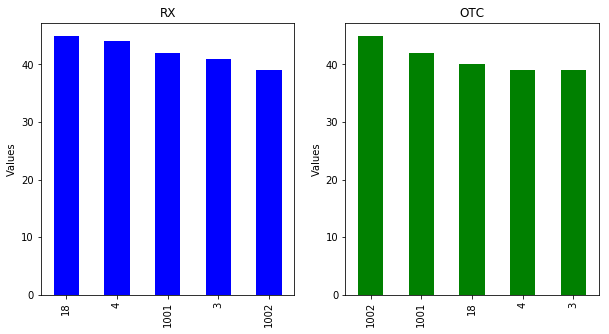

In [778]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['IdLocation'][df['Product Classification'] =='RX'].value_counts().plot( kind='bar' , color='blue' ) 
plt.ylabel('Values')
plt.title('RX')

plt.subplot(1, 2, 2)
df['IdLocation'][df['Product Classification'] =='OTC'].value_counts().plot( kind='bar' , color='green' ) 
plt.ylabel('Values')
plt.title('OTC')
plt.show()

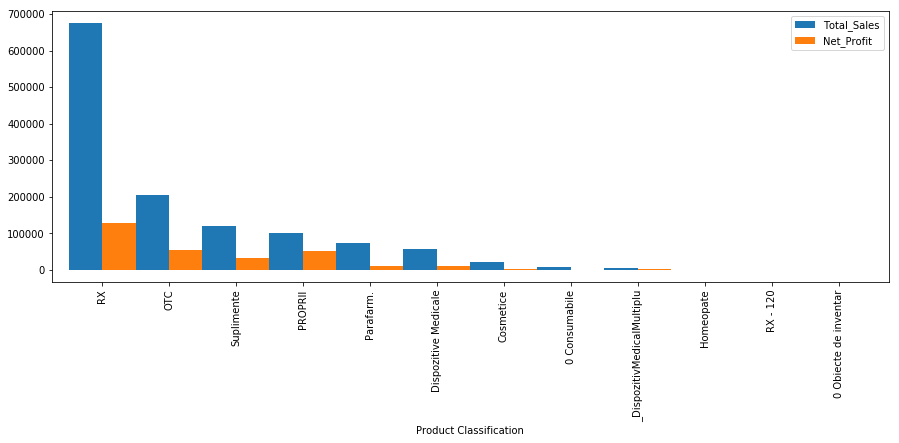

In [781]:
b = df.groupby(['Product Classification'],sort = False)['Total_Sales','Net_Profit'].sum()
b.sort_values(by='Total_Sales',ascending=False).plot( kind = 'bar' ,figsize = (15,5) , width=1)



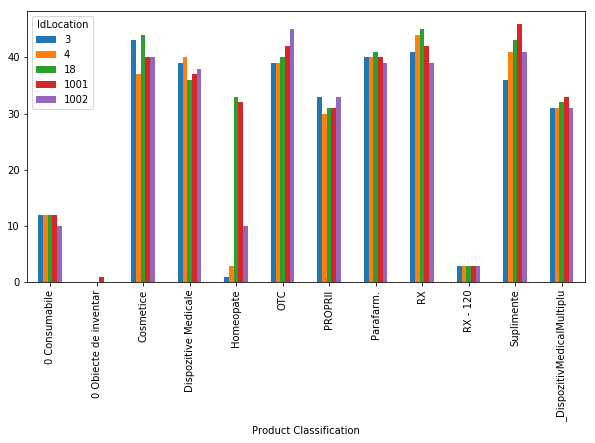

In [780]:
pd.crosstab(df['Product Classification'],df['IdLocation']).plot( kind = 'bar' , figsize = (10,5) )
plt.show()

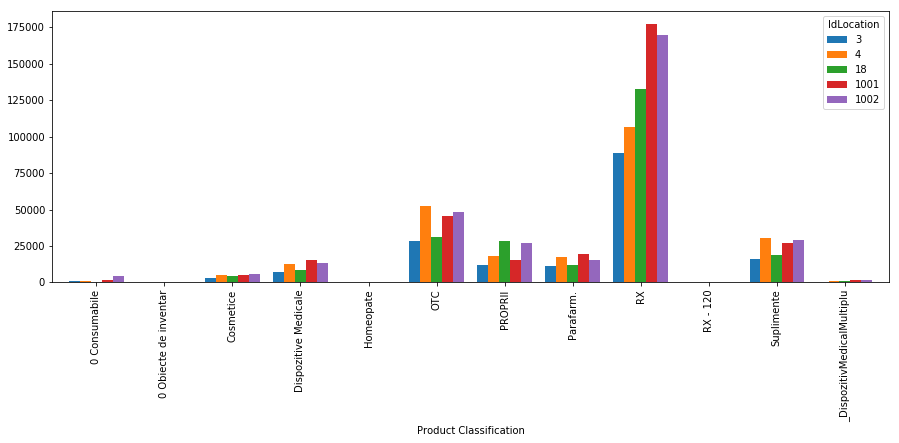

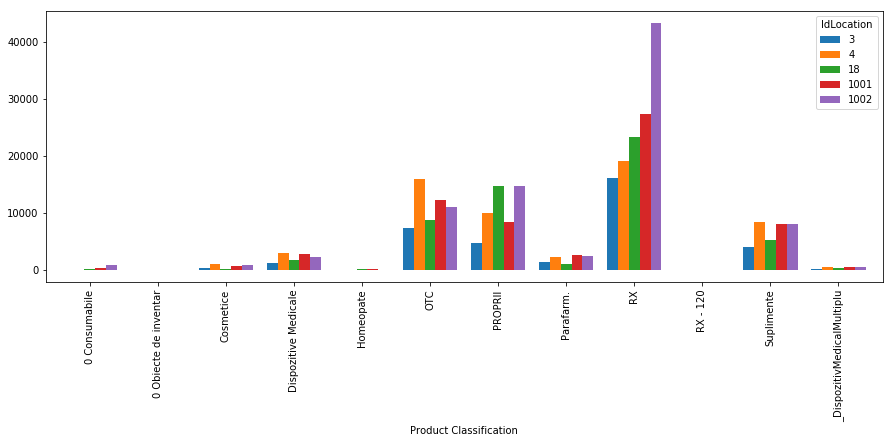

In [782]:
plt.figure()
df.groupby(['Product Classification','IdLocation'])['Total_Sales'].sum().unstack().plot(kind='bar',subplots=False ,stacked=False , figsize=(15,5), width=0.8)
df.groupby(['Product Classification','IdLocation'])['Net_Profit'].sum().unstack().plot(kind='bar',subplots=False ,stacked=False, figsize=(15,5), width=0.8)

plt.show()

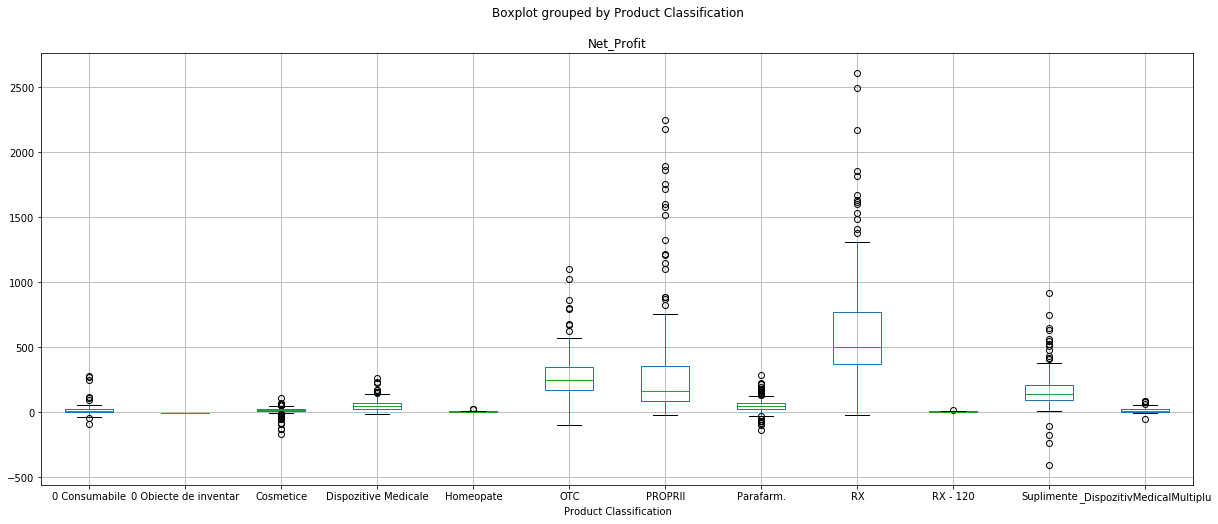

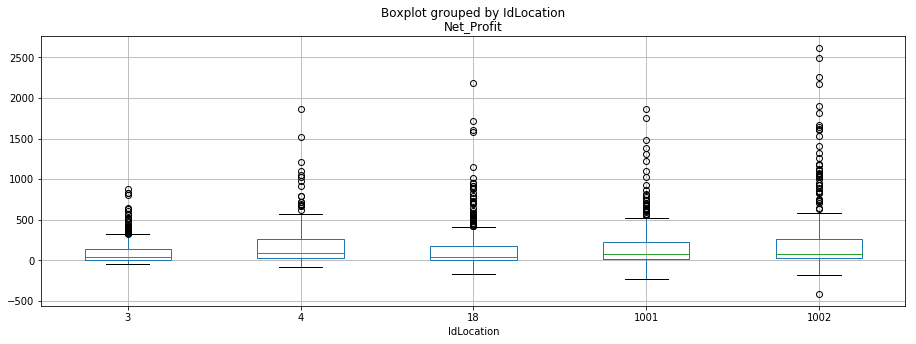

In [791]:
df.boxplot(column="Net_Profit" , by = 'Product Classification' , figsize=(20,8))
df.boxplot(column="Net_Profit" , by = 'IdLocation' , figsize=(15,5))

plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\legend.py:590: UserWarning: The handle <Container object of 5 artists> has a label of '_DispozitivMedicalMultiplu' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


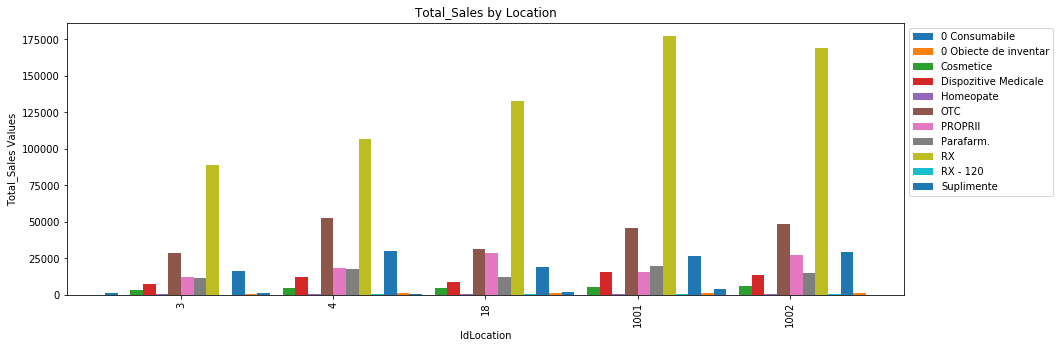

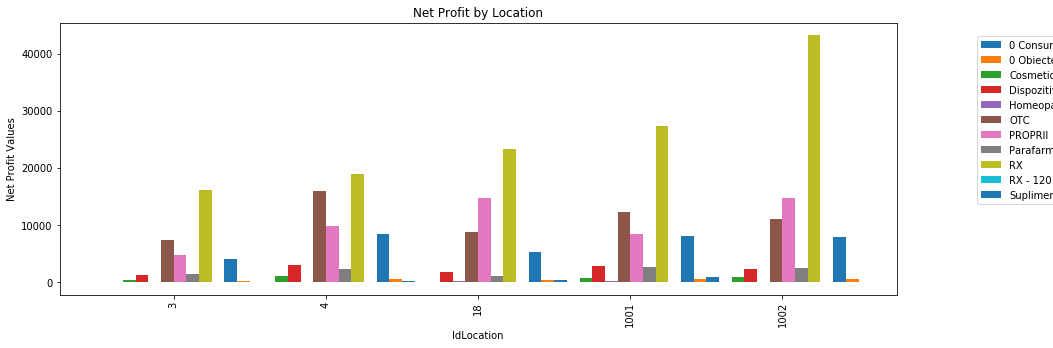

In [375]:
#plt.figure(figsize=(10, 5))

#plt.subplot(1, 2, 1)
a1 = df.groupby(['Product Classification','IdLocation'])['Total_Sales'].sum()
a1 = a1.unstack('Product Classification')#.sort_values(by='Total_Sales',ascending=True)
#print(a1)
a1.plot(kind='bar',subplots=False , figsize=(15,5) , width=1)

#df.groupby(['Product Classification','IdLocation'])['Total_Sales'].sum().unstack('Product Classification').plot(kind='bar',subplots=False , figsize=(10,5))
ax=plt.gca()
plt.ylabel('Total_Sales Values')
plt.title('Total_Sales by Location')
leg = plt.legend( loc = 'upper left')
plt.draw() # Draw the figure so you can find the positon of the legend. 
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 1
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


df.groupby(['Product Classification','IdLocation'])['Net_Profit'].sum().unstack('Product Classification').plot(kind='bar',subplots=False , figsize=(15,5), width=1)
plt.ylabel('Net Profit Values')
plt.title('Net Profit by Location')
leg = plt.legend( loc = 'upper left')
plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 1
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.show()

In [756]:
np.unique(df.IdLocation).tolist()
np.unique(df['Product Classification'])

array(['0 Consumabile', '0 Obiecte de inventar', 'Cosmetice',
       'Dispozitive Medicale', 'Homeopate', 'OTC', 'PROPRII', 'Parafarm.',
       'RX', 'RX - 120', 'Suplimente', '_DispozitivMedicalMultiplu'],
      dtype=object)

In [757]:
#df.groupby(['Product Classification','IdLocation'])['Total_Sales','Net_Profit'].sum()
df.groupby(['IdLocation'])['Total_Sales'].sum()

IdLocation
3       168764.91
4       244735.70
18      237503.71
1001    308659.38
1002    313686.26
Name: Total_Sales, dtype: float64

In [489]:
#GroupBy C2
grouped = df.groupby(['IdLocation','Product_Name'])['Total_Sales','Net_Profit'].sum().reset_index()
grouped = grouped.sort_values(by=['Net_Profit'],ascending=False)

grouped.head(10)
#grouped.head(10).plot( kind = 'bar' ,figsize = (15,5))
#plt.show()

,IdLocation,Product_Name,Total_Sales,Net_Profit
870,1002,Eprazol Atb 20 Mg X 20 Cps. Gastr.,14227.36,7283.20
534,18,O-Dis L-Arginina 500 Mg X 50 Cps.,9757.28,5477.54
951,1002,O-Dis L-Arginina 500 Mg X 50 Cps.,9818.84,5475.83
868,1002,Eductal Mr 35 Mg X 60 Cpr. Film.,18539.33,5068.76
927,1002,Ntoxi Ret 400 Mg X 40 Cpr.,13747.98,4815.41
644,1001,Dureon 2 Mg X 4 Stilouri Injectoare,43564.12,4729.73
301,4,O-Dis L-Arginina 500 Mg X 50 Cps.,8235.09,4596.17
744,1001,O-Dis L-Arginina 500 Mg X 50 Cps.,7380.89,4080.24
840,1002,Amistar 600 Mg X 20 Cpr. Film.,17282.34,3862.86
1006,1002,Taserc 24 Mg X 60 Cpr. - Bgp,11618.42,3216.05


### Two-Sample T-Test

In [650]:
import scipy.stats as stats
from scipy.stats import ttest_ind


In [656]:
g = df.groupby(['Product Classification'])['Total_Sales','Net_Profit'].sum()
g['Total_Sales']

Product Classification
0 Consumabile                   8499.23
0 Obiecte de inventar              0.30
Cosmetice                      22909.08
Dispozitive Medicale           56576.59
Homeopate                       1478.58
OTC                           205599.16
PROPRII                       100480.37
Parafarm.                      75215.78
RX                            675328.83
RX - 120                         459.06
Suplimente                    121623.63
_DispozitivMedicalMultiplu      5179.35
Name: Total_Sales, dtype: float64

In [688]:
half_length = int(len(df.Total_Sales)/2)


sample1 = df['Total_Sales'].sample(half_length)
sample2 = df['Total_Sales'].sample(half_length)

#prin#t(sample1)
#print(sample2)
print(ttest_ind(sample1, sample2, equal_var=False))

Ttest_indResult(statistic=1.001069494619465, pvalue=0.31693806412065956)


In [692]:
length = int(len(df.Total_Sales)/2)
sample1 = df['Total_Sales'][:length]
#print(sample1)
sample2 = df['Net_Profit'][length:]

print(ttest_ind(sample1, sample2, equal_var=False))

Ttest_indResult(statistic=10.985347380670344, pvalue=1.6948144960596502e-26)
